n_dot 1

Fixed mu solver
mu_d [0.1]
estimate no of electrons on dot (simple solver) [ 6.85860192]
estimated no of electrons on dot (iterative) [ 6.85860192]
Energy -0.663315660352

Fixed N solver
N_d [26]

simple(non iter) : dot potential [ 0.28949984]
Energy -3.77666558019

simple : dot potential [ 0.28949984]
{'b0': (14, 44), 'num_dot': 1, 'l0': (0, 13), 'b1': (55, 85), 'l1': (86, 99), 'd0': (45, 54)}
Energy -3.77666558019

simple iter : dot potential [ 0.22901454]
{'b0': (14, 39), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'l1': (86, 99), 'd0': (40, 59)}
Energy -2.73077581945

opt : dot potential [ 0.2234323]
{'b0': (14, 39), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'l1': (86, 99), 'd0': (40, 59)}
Energy -2.58249004324
opt_iter : dot potential [ 0.2234323]
{'b0': (14, 39), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'l1': (86, 99), 'd0': (40, 59)}
Energy -2.58249004324


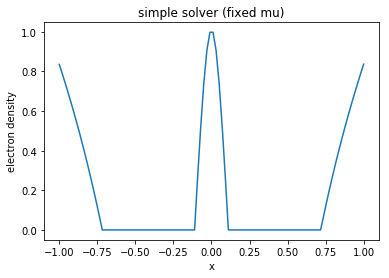

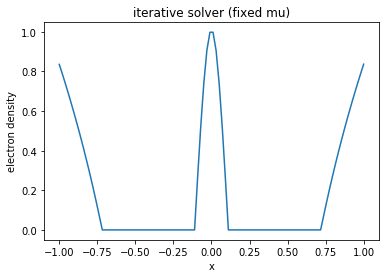

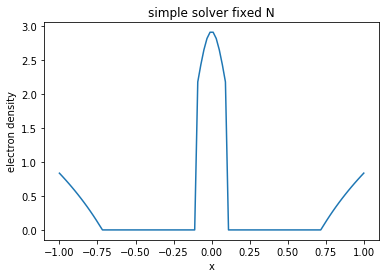

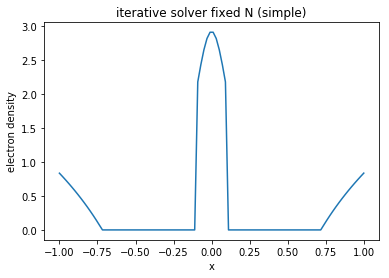

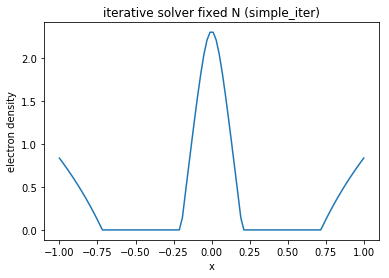

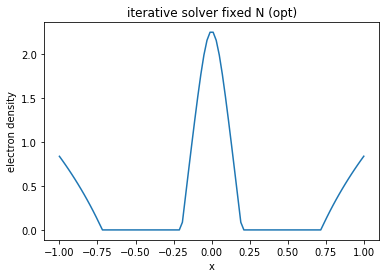

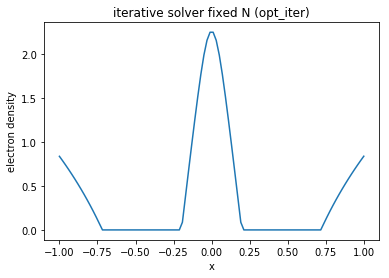

In [21]:
# Testnotebook for the Thomas Fermi module
# All TF solvers can be tested. Exceptions should be handled automatically.

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import thomas_fermi
imp.reload(thomas_fermi)
import mask
imp.reload(mask)
import potential_profile
import exceptions

E_scale = 'eV'
dx_scale = '1e-9'

kT = 400e-6
b1 = (-200e-3,-0.3,0.1,1)
d = (200e-3,0.0,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

x = np.linspace(-1,1,100)
V = potential_profile.V_x_wire(x,[b1,d,b2])

K_onsite = 2e-3
sigma = x[1] - x[0]
x_0 = 0.001*(x[1] - x[0])
mu_l = (100.0e-3,100.1e-3)
battery_weight = 100

model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

my_tf = thomas_fermi.ThomasFermi(model_physics)
print("n_dot",my_tf.find_n_dot_estimate())

mu_d = [mu_l[0]]*my_tf.mask.mask_info['num_dot']

# testing the fixed mu solvers
print("\nFixed mu solver")
print("mu_d",mu_d)
n,N_d = my_tf.tf_solver_fixed_mu(mu_d)
plt.figure(1)
plt.plot(x,n)
plt.title("simple solver (fixed mu)")
plt.xlabel('x')
plt.ylabel('electron density')
print("estimate no of electrons on dot (simple solver)",N_d)

n,N_d = my_tf.tf_iterative_solver_fixed_mu(mu_d)
plt.figure(2)
plt.plot(x,n)
plt.title("iterative solver (fixed mu)")
plt.xlabel('x')
plt.ylabel('electron density')
print("estimated no of electrons on dot (iterative)",N_d)
E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
print("Energy",E)

print("\nFixed N solver")
# testing the fixed N solvers
N_d = [26]
print("N_d",N_d)
n,mu_d = my_tf.tf_solver_fixed_N(N_d)
plt.figure(3)
plt.plot(x,n)
plt.title("simple solver fixed N")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nsimple(non iter) : dot potential",mu_d)
E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
print("Energy",E)

n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple")
plt.figure(4)
plt.plot(x,n)
plt.title("iterative solver fixed N (simple)")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nsimple : dot potential",mu_d)
print(my_tf.mask.mask_info)
E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
print("Energy",E)

try:
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple_iter")
    plt.figure(5)
    plt.plot(x,n)
    plt.title("iterative solver fixed N (simple_iter)")
    plt.xlabel('x')
    plt.ylabel('electron density')
    print("\nsimple iter : dot potential",mu_d)
    print(my_tf.mask.mask_info)
    E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
    print("Energy",E)
except exceptions.InvalidChargeState:
    n = []
    mu_d = []
    print("\nsimple iter : Invalid charge state.")
    
n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="opt")
plt.figure(6)
plt.plot(x,n)
plt.title("iterative solver fixed N (opt)")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nopt : dot potential",mu_d)
print(my_tf.mask.mask_info)
E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
print("Energy",E)

try:
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="opt_iter")
    plt.figure(7)
    plt.plot(x,n)
    plt.title("iterative solver fixed N (opt_iter)")
    plt.xlabel('x')
    plt.ylabel('electron density')
    print("opt_iter : dot potential",mu_d)
    print(my_tf.mask.mask_info)
    E = my_tf.calculate_thomas_fermi_energy(n,mu_d)
    print("Energy",E)
except exceptions.InvalidChargeState:
    n = []
    mu_d = []
    print("\nopt iter : Invalid charge state.")


#N_calc = my_tf.calculate_N_d_from_n(n) 
#print("Number of electron on dot from n",N_d)

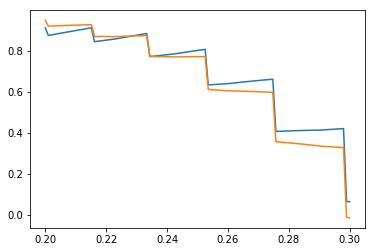

In [28]:
# mu_d vs V_d plot
# parameters except for V_d used are defined in the first test
imp.reload(thomas_fermi)
V_d_vec = np.linspace(200e-3,300e-3,100)
mu_d_vec = np.zeros(len(V_d_vec))
E_d_vec = np.zeros((2,len(V_d_vec)))

for i in range(len(V_d_vec)):
    d = (V_d_vec[i],0.0,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    
    model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

    my_tf = thomas_fermi.ThomasFermi(model_physics)
    try:
        # to get a prelim_mask
        ndot = my_tf.find_n_dot_estimate()
        # run the fixed mu solver to get an estimate on number of e on dot
        mu_d = [mu_l[0]]*my_tf.mask.mask_info['num_dot']
        n,N_d = my_tf.tf_solver_fixed_mu(mu_d)

        N_est = [np.floor(x) for x in N_d]
    
        N_est = [0]
        n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_est,strategy="simple")
        mu_d_vec[i] = mu_d[0]
        E_d_vec[0,i] = my_tf.calculate_thomas_fermi_energy(n,mu_d)
    except exceptions.InvalidChargeState:
        n = []
        mu_d = []
        #print("\nopt iter : Invalid charge state. No dot")

for i in range(len(V_d_vec)):
    d = (V_d_vec[i],0.0,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    
    model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

    my_tf = thomas_fermi.ThomasFermi(model_physics)
    try:
        # to get a prelim_mask
        ndot = my_tf.find_n_dot_estimate()
        # run the fixed mu solver to get an estimate on number of e on dot
        mu_d = [mu_l[0]]*my_tf.mask.mask_info['num_dot']
        n,N_d = my_tf.tf_solver_fixed_mu(mu_d)

        N_est = [np.floor(x) for x in N_d]
    
        N_est = [1]
        n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_est,strategy="simple")
        mu_d_vec[i] = mu_d[0]
        E_d_vec[1,i] = my_tf.calculate_thomas_fermi_energy(n,mu_d)
    except exceptions.InvalidChargeState:
        n = []
        mu_d = []
        #print("\nopt iter : Invalid charge state. No dot")
        
    
plt.plot(V_d_vec,E_d_vec[0,:])
plt.plot(V_d_vec,E_d_vec[1,:])

In [ ]:
%pdb

In [ ]:
print(my_tf.K)

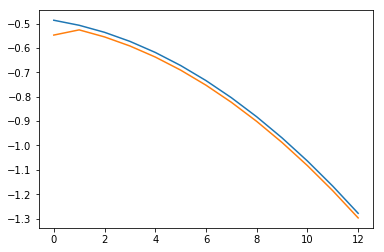

In [16]:
imp.reload(thomas_fermi)
E1 = []
for i in range(2,15):
    N_d = [i]
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple")
    
    d = (200e-3,0.0,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    my_tf.V = V
    E1 += [my_tf.calculate_thomas_fermi_energy(n,mu_d)]
    
E2 = []
for i in range(2,15):
    N_d = [i]
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple")
    
    d = (210e-3,0.0,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    my_tf.V = V
    E2 += [my_tf.calculate_thomas_fermi_energy(n,mu_d)]

plt.plot(E1)
plt.plot(E2)

In [7]:
print(E1,E2)


[0.87224919938587631, 0.9198789757641197, 0.97575875214236318, 1.0398885285206065, 1.11226830489885, 1.1928980812770935, 1.2817778576553365, 1.3789076340335802, 1.4842874104118233, 1.5979171867900668, 1.7197969631683101, 1.8499267395465535, 1.9883065159247963, 2.1349362923030402, 2.289816068681283] [0.87224919938587631, 0.9198789757641197, 0.97575875214236318, 1.0398885285206065, 1.11226830489885, 1.1928980812770935, 1.2817778576553365, 1.3789076340335802, 1.4842874104118233, 1.5979171867900668, 1.7197969631683101, 1.8499267395465535, 1.9883065159247963, 2.1349362923030402, 2.289816068681283]


In [2]:
%lprun 2*2

ERROR:root:Line magic function `%lprun` not found.
